In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

In [ ]:

df=pd.read_csv("/content/drive/MyDrive/spam.csv",encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder as le
encoder= le()
df['v1']=encoder.fit_transform(df['v1'])

In [ ]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.shape

(5169, 2)

In [ ]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.nunique()

v1       2
v2    5169
dtype: int64

0-->not spam
1-->spam 

In [ ]:
 df['v1'].value_counts()

0    4516
1     653
Name: v1, dtype: int64

([<matplotlib.patches.Wedge at 0x7f2001f3df00>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'not spam'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.367'),
  Text(0.5533635081542612, -0.23192418555038377, '12.633')])

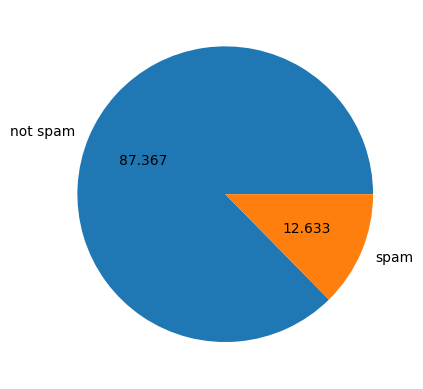

In [ ]:
plt.pie(df['v1'].value_counts(), labels=["not spam", "spam"],autopct="%0.3f")

here the data is imbalanced data which means the number of spam mails are very less than non spam mails by doing M.L on these type of data results to biased results

NLTK-natural language tool kit is used 

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['chars']=df['v2'].apply(len)

In [ ]:
df.head()

,v1,v2,chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['word']=df['v2'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,v1,v2,chars,word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['sentences']=df['v2'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,v1,v2,chars,word,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df.drop('v1',axis=1).describe()

,chars,word,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['v1'] == 1][['chars','word','sentences']].describe()

,chars,word,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
df[df['v1'] == 0][['chars','word','sentences']].describe()

,chars,word,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='chars', ylabel='Count'>

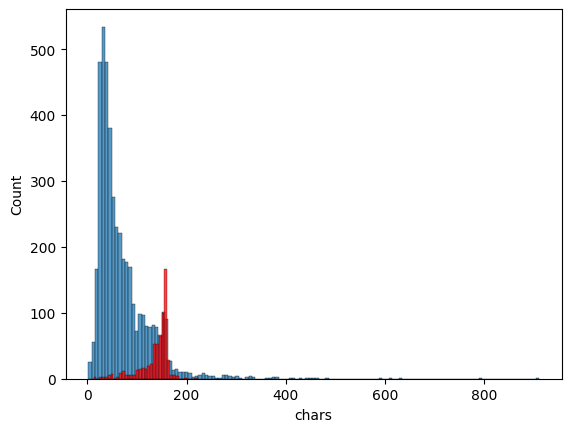

In [ ]:
sns.histplot(df[df['v1']==0]['chars'])
sns.histplot(df[df['v1']==1]['chars'],color='red')

<Axes: xlabel='word', ylabel='Count'>

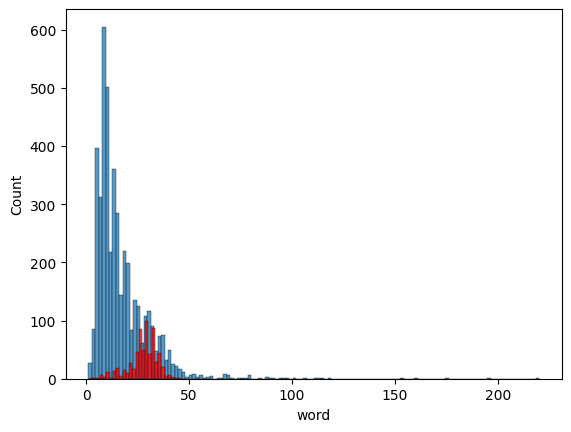

In [ ]:
sns.histplot(df[df['v1']==0]['word'])
sns.histplot(df[df['v1']==1]['word'],color='red')

<Axes: xlabel='sentences', ylabel='Count'>

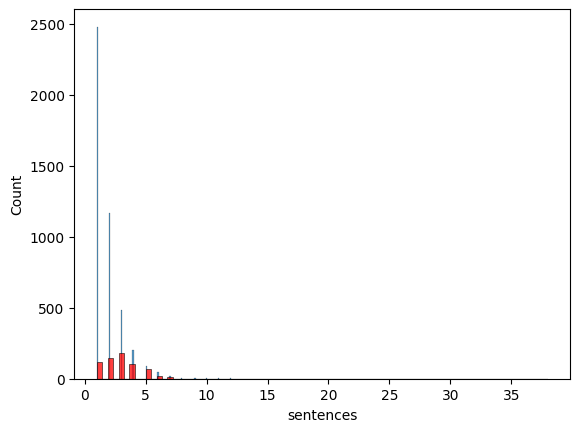

In [ ]:
sns.histplot(df[df['v1']==0]['sentences'])
sns.histplot(df[df['v1']==1]['sentences'],color='red')

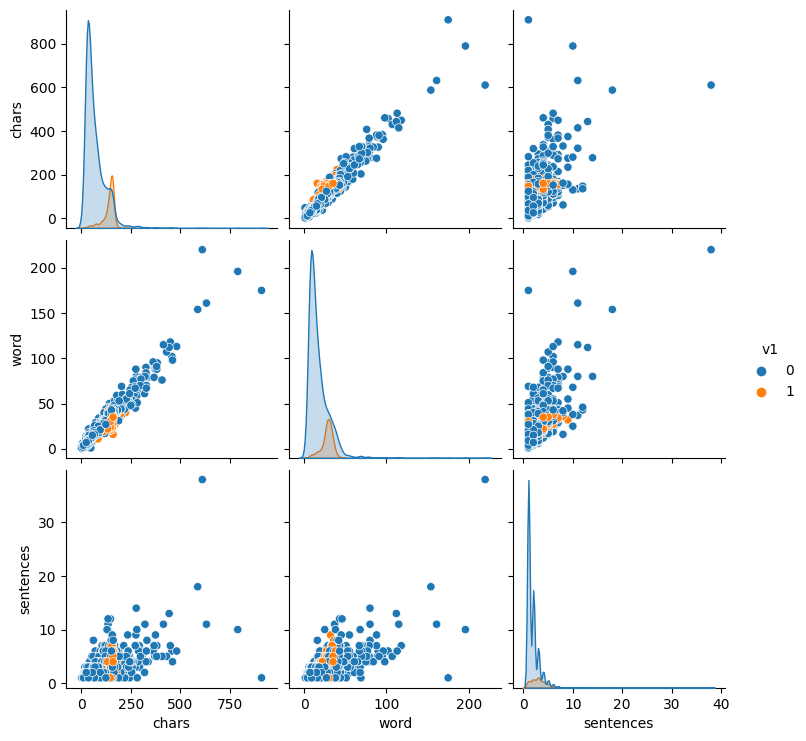

In [ ]:
sns.pairplot(df,hue='v1')

DATA PROCESSING  

*lower case

*Tokenization

*removing special characters

*removing stop words and punctuations

*stemming

removes all the special characters


In [ ]:
def transform_text(text):
      text=text.lower()
      text=nltk.word_tokenize(text)
      y=[]
      for i in text:
        if i.isalnum():
          y.append(i)

      text=y[:]
      y.clear()
      for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i) 
      text=y[:]
      y.clear()
      for i in text:
        y.append(ps.stem(i))
      return " ".join(y)

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

Tokenizing

In [ ]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
df['trans_text']=df['v2'].apply(transform_text)

In [ ]:
df.head()

,v1,v2,chars,word,sentences,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(df[df['v1'] == 1]['trans_text'].str.cat(sep=" "))

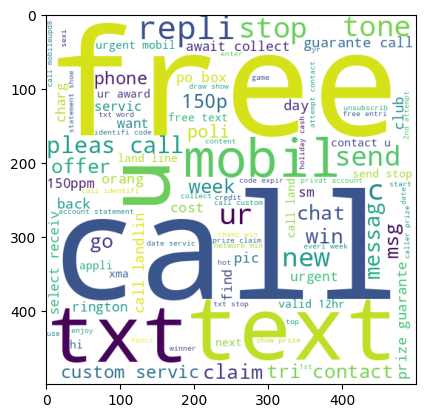

In [ ]:
plt.imshow(spam_wc)

In [ ]:
spam_wc1=wc.generate(df[df['v1'] == 0]['trans_text'].str.cat(sep=" "))

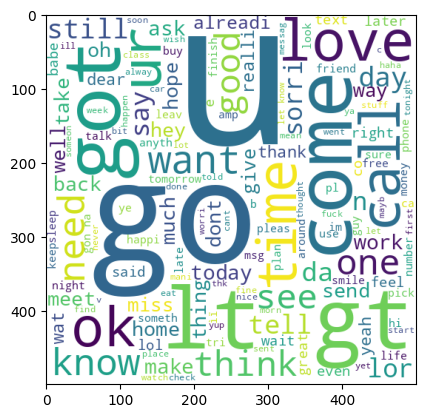

In [ ]:
plt.imshow(spam_wc1)

Top 50 words used in spam sms

In [ ]:
spam_corpus=[]
for msg in df[df['v1']==1]['trans_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(50))


Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [ ]:
x=cv.fit_transform(df['trans_text']).toarray()
x.shape

(5169, 6708)

In [ ]:
df.head()                     

,v1,v2,chars,word,sentences,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
y=df['v1'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [ ]:
mnb.fit(x_train,y_train)
y_pred1=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [ ]:
bnb.fit(x_train,y_train)
y_pred2=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


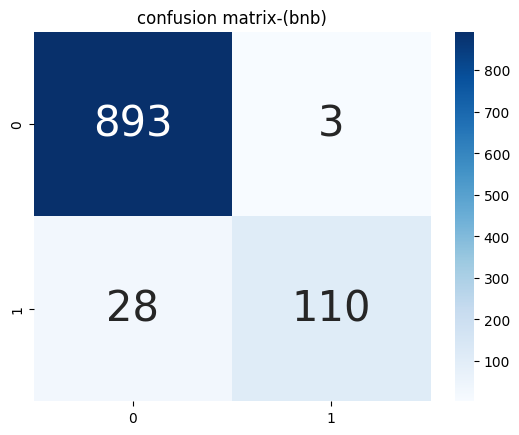

In [ ]:
ax=plt.axes()
con_mat=confusion_matrix(y_test,y_pred2)
sns.heatmap(con_mat, annot=True,annot_kws={"size":30},fmt='d', cmap="Blues",ax=ax)
ax.set_title('confusion matrix-(bnb)')
plt.show()

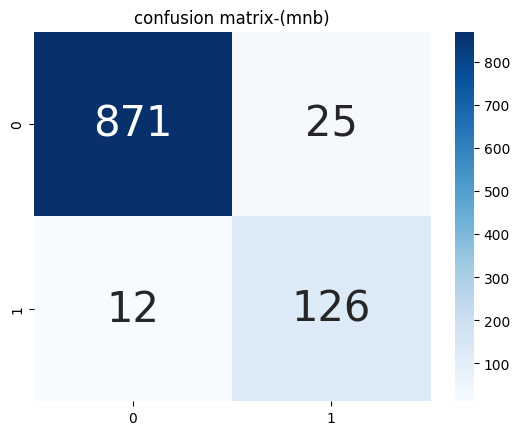

In [ ]:
ax=plt.axes()
con_mat=confusion_matrix(y_test,y_pred1)
sns.heatmap(con_mat, annot=True,annot_kws={"size":30},fmt='d', cmap="Blues",ax=ax)
ax.set_title('confusion matrix-(mnb)')
plt.show()

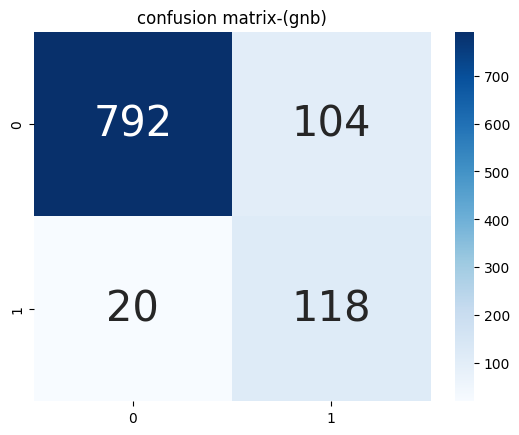

In [ ]:
ax=plt.axes()
con_mat=confusion_matrix(y_test,y_pred)
sns.heatmap(con_mat, annot=True,annot_kws={"size":30},fmt='d', cmap="Blues",ax=ax)
ax.set_title('confusion matrix-(gnb)')
plt.show()